## Dengue patient classification project


 **Life cycle of Machine learning Project**
  * Understanding the Problem Statement
  * Data Collection
  * Exploratory data analysis
  * Data Cleaning
  * Data Pre-Processing
  * Model Training
  * Choose best model

### 1) Problem Statement
This project predicts the likelihood of dengue infection using patient data such as age, gender, area type, and test results (NS1, IgG, IgM). The model aims to assist in early diagnosis and improve healthcare response during dengue outbreaks in Bangladesh

### 2) Data Collection
The dataset used in this project is sourced from Kaggle, specifically from the "Dengue Patient Classification" dataset. It contains various features related to patients, including demographic information and test results for dengue infection.

In [3]:
## Import Data and Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the dataset
data = pd.read_csv('dataset.csv')
data.head(5)

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [7]:
#Chceck the shape of the dataset
data.shape

(1000, 10)

In [8]:
# Summary Statistics
data.describe()

,Age,NS1,IgG,IgM,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.924000,0.519000,0.533000,0.475000,0.533000
std,16.468437,0.499889,0.499159,0.499624,0.499159
min,8.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,1.000000,0.000000,1.000000
75%,50.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Check the data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


### 3) Exploratory Data Analysis (EDA)

In [27]:
# Check and Define the numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"We have {len(numerical_cols)} numerical columns: {numerical_cols}")
print(f"We have {len(categorical_cols)} categorical columns: {categorical_cols}")


We have 5 numerical columns: ['Age', 'NS1', 'IgG', 'IgM', 'Outcome']
We have 5 categorical columns: ['Gender', 'Area', 'AreaType', 'HouseType', 'District']


In [35]:
# proportion of count data on categorical columns
for col in categorical_cols:
    print(data[col].value_counts(normalize=True)*100)
    print('---------------------------')

Gender
Female    52.4
Male      47.6
Name: proportion, dtype: float64
---------------------------
Area
Demra                  3.8
Jatrabari              3.8
Mirpur                 3.4
Bangshal               3.4
Kadamtali              3.4
Dhanmondi              3.4
New Market             3.3
Keraniganj             3.3
Tejgaon                3.1
Badda                  3.1
Paltan                 3.1
Sutrapur               3.1
Biman Bandar           3.0
Rampura                3.0
Khilkhet               3.0
Ramna                  3.0
Banasree               2.9
Mohammadpur            2.8
Gulshan                2.8
Motijheel              2.7
Kalabagan              2.7
Kafrul                 2.6
Kamrangirchar          2.6
Hazaribagh             2.5
Shahbagh               2.4
Bosila                 2.4
Khilgaon               2.3
Sher-e-Bangla Nagar    2.3
Pallabi                2.3
Sabujbagh              2.3
Chawkbazar             2.2
Gendaria               2.2
Adabor                 2.2
Canton

**Insight the data**
  * The dataset contains both numerical and categorical features.
  * The dataset has balanced classes for the target variable 'Outcome'.

### Univariate Analysis

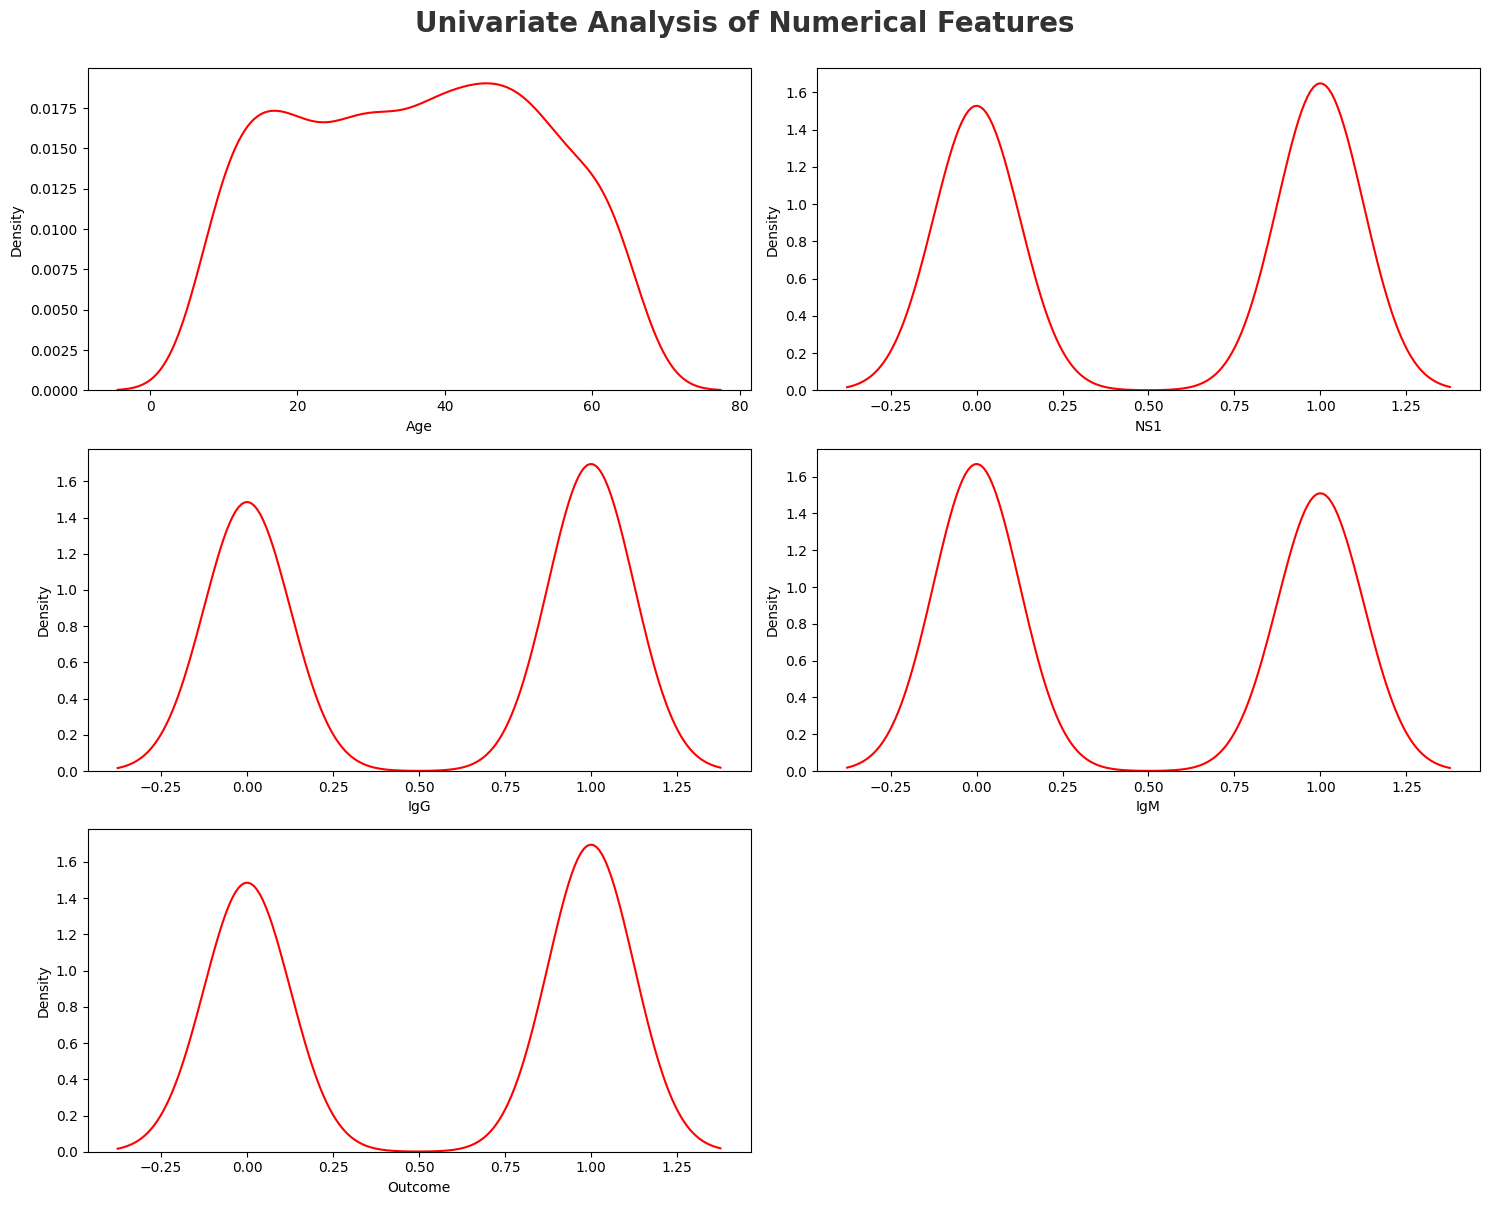

In [41]:
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Calculate required grid dimensions
n_cols = 2
n_rows = (len(numerical_cols) + 1) // 2  # Ceiling division to ensure enough subplots

for i in range(0, len(numerical_cols)):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=data[numerical_cols[i]], color='red')
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()

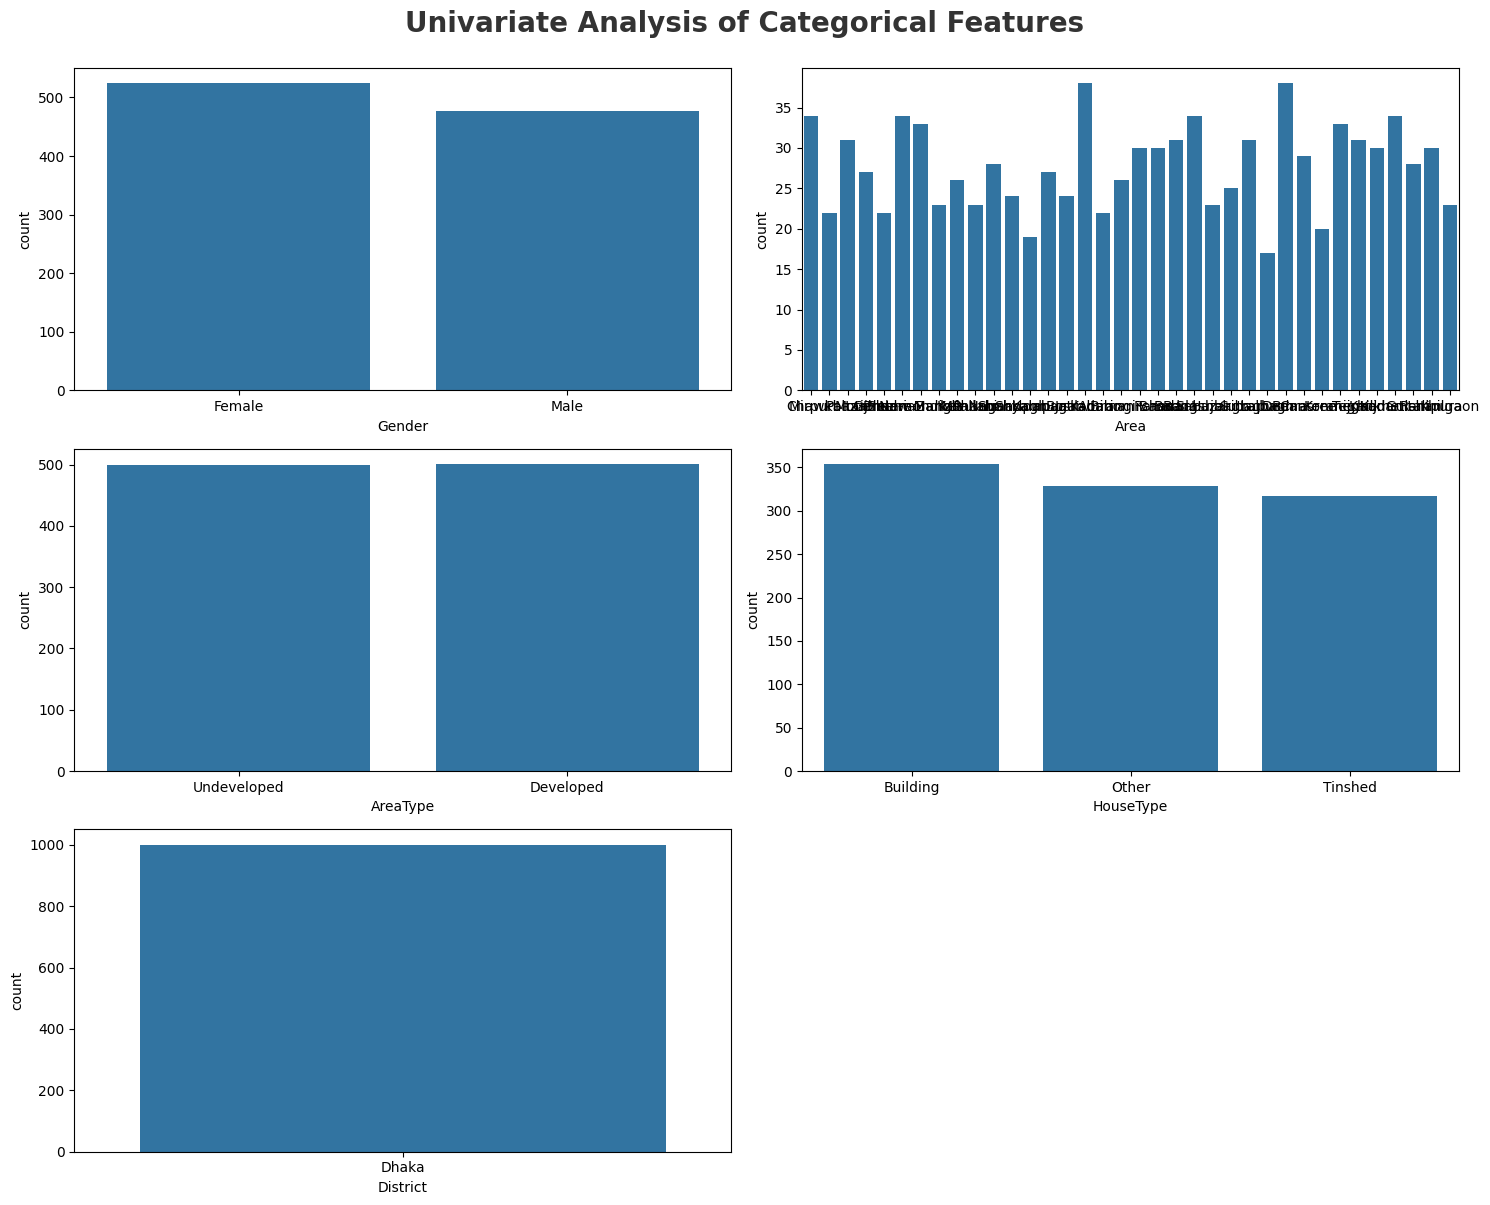

In [48]:
# Univariate Analysis of Categorical Features
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
n_cols=2
n_rows = (len(categorical_cols) + 1) // 2  # Ceiling division to ensure enough subplots

for i in range(0, len(categorical_cols)):
    
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=data[categorical_cols[i]])
    plt.xlabel(categorical_cols[i])
    plt.tight_layout()

### Multivariate Analysis

In [50]:
data[numerical_cols].corr()

,Age,NS1,IgG,IgM,Outcome
Age,1.000000,-0.009917,-0.011750,0.048918,-0.011750
NS1,-0.009917,1.000000,0.972313,0.045991,0.972313
IgG,-0.011750,0.972313,1.000000,0.023380,1.000000
IgM,0.048918,0.045991,0.023380,1.000000,0.023380
Outcome,-0.011750,0.972313,1.000000,0.023380,1.000000


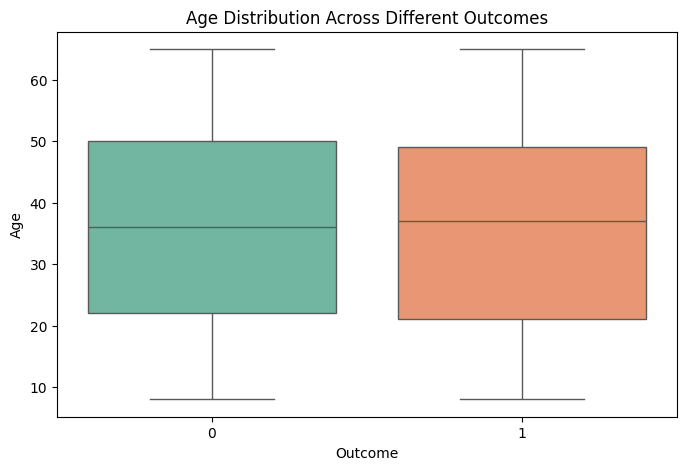

In [56]:
#Age vs. Outcome (Severity/Recovery Trend)
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Age", data=data, palette="Set2")
plt.title("Age Distribution Across Different Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()


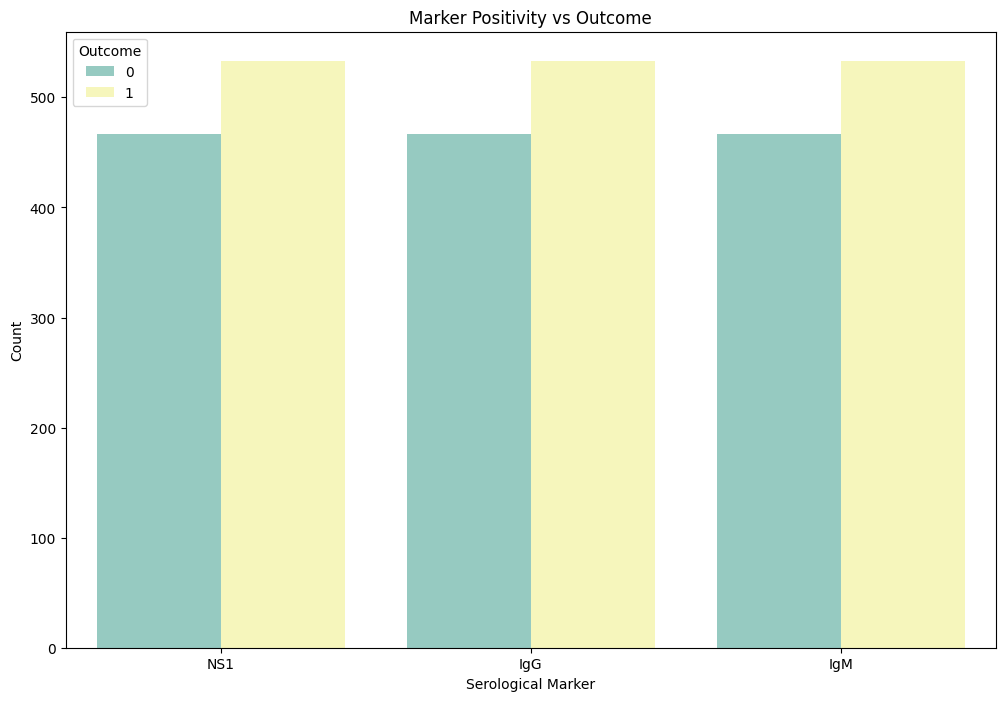

In [60]:
plt.figure(figsize=(12,8))
marker_cols = ['NS1', 'IgG', 'IgM']

# Convert to long format for easier plotting
df_melted = data.melt(id_vars='Outcome', value_vars=marker_cols, var_name='Marker', value_name='Result')

sns.countplot(data=df_melted, x='Marker', hue='Outcome', palette='Set3')
plt.title("Marker Positivity vs Outcome")
plt.xlabel("Serological Marker")
plt.ylabel("Count")
plt.legend(title="Outcome")
plt.show()


In [64]:
import pandas as pd

# Initialize lists
continuous_features = []
discrete_features = []

# Loop through all columns
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        # Consider as continuous if it has many unique values
        if data[col].nunique() > 10:
            continuous_features.append(col)
        else:
            discrete_features.append(col)
    else:
        # Non-numeric treated as categorical/discrete
        discrete_features.append(col)

print("Continuous Features:", continuous_features)
print("Discrete/Categorical Features:", discrete_features)


Continuous Features: ['Age']
Discrete/Categorical Features: ['Gender', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType', 'District', 'Outcome']


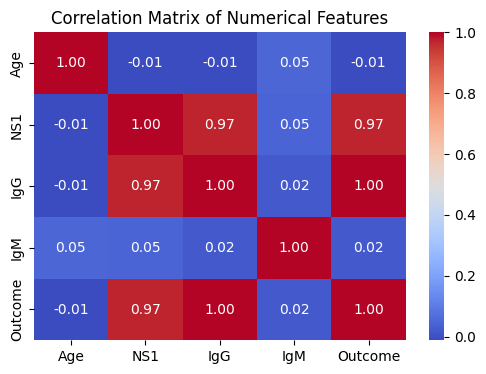

In [66]:


# Correlation matrix
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


([<matplotlib.patches.Wedge at 0x1bd4dc425a0>,
 [Text(-1.0940938892883614, -0.11383567728030936, 'Positive'),
  Text(1.19355695927621, 0.12418447955895087, 'Negative')],
 [Text(-0.5967784850663789, -0.06209218760744146, '53.30%'),
  Text(0.6962415595777892, 0.072440946409388, '46.70%')])

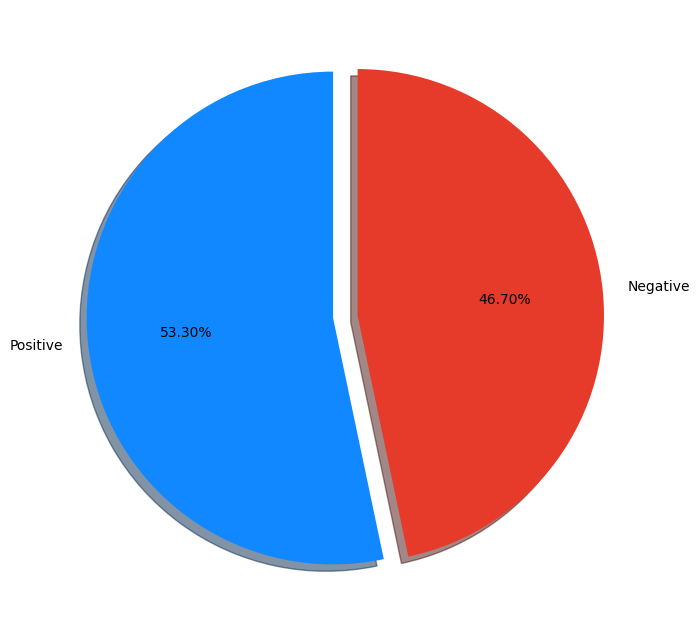

In [73]:
percentage = data.Outcome.value_counts(normalize=True)*100
labels = ["Positive","Negative"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)

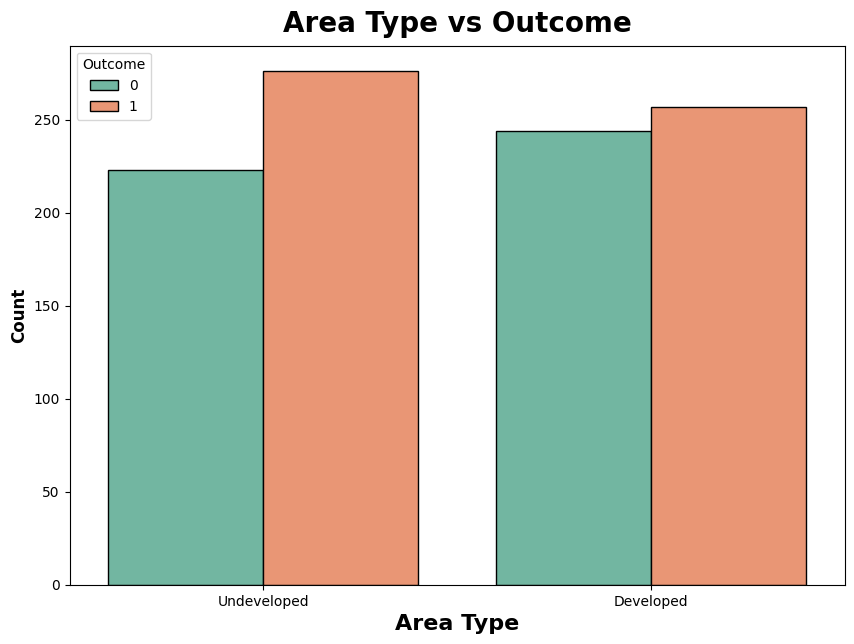

In [87]:
plt.subplots(figsize=(10,7))
sns.countplot(x="AreaType",hue="Outcome", data=data, ec = "black",palette="Set2")
plt.title("Area Type vs Outcome", weight="bold",fontsize=20, pad=10)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Area Type", weight="bold", fontsize=16)
plt.legend(title="Outcome", fancybox=True)
plt.show()

In [80]:
data.columns

Index(['Gender', 'Age', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType',
       'District', 'Outcome'],
      dtype='object')

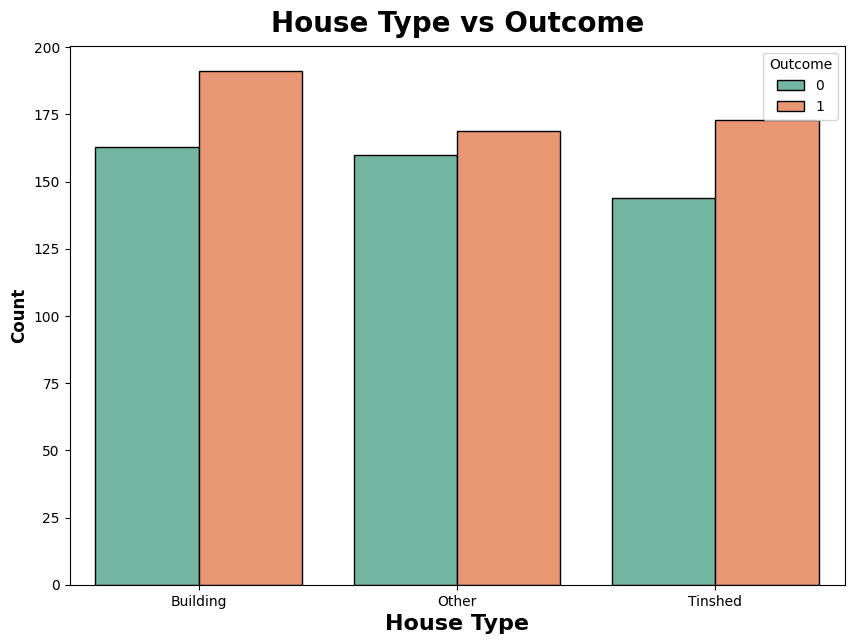

In [88]:
plt.subplots(figsize=(10,7))
sns.countplot(x="HouseType",hue="Outcome", data=data, ec = "black",palette="Set2")
plt.title("House Type vs Outcome", weight="bold",fontsize=20, pad=10)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("House Type", weight="bold", fontsize=16)
plt.legend(title="Outcome", fancybox=True)
plt.show()